**Sistem Klasifikasi Sampah Menggunakan CNN**
---

**Oleh :**


*   Arifa Muthmainnah (2308107010012)                


**Dataset :**      
[Waste Garbage Management Dataset](https://huggingface.co/datasets/omasteam/waste-garbage-management-dataset)

**Deskripsi Dataset :**   

Dataset *Waste Garbage Management* merupakan dataset citra (image dataset) yang digunakan untuk klasifikasi sampah menggunakan pendekatan visi komputer. Dataset ini berisi sekitar **19.000+ gambar** sampah dengan berbagai kondisi pencahayaan dan latar belakang, sehingga merepresentasikan kondisi nyata di lingkungan sehari-hari.

Setiap data berupa citra berwarna (RGB) yang telah diberi label kelas sesuai jenis sampahnya. Dataset ini sangat sesuai untuk penerapan **Convolutional Neural Network (CNN)** karena memiliki jumlah data yang cukup besar dan variasi visual yang tinggi.  
  
  
**Tujuan Proyek :**  
1. Membangun sistem klasifikasi sampah berbasis citra menggunakan CNN.
2. Mengklasifikasikan sampah berdasarkan komposisinya, seperti plastik, kertas, kaca, logam, tekstil, dan residu.
3. Menerapkan konsep visi komputer dan deep learning untuk permasalahan nyata di kehidupan sehari-hari.


      
> *Dibuat untuk memenuhi nilai Ujian Akhir Semester Mata Kuliah Visi Komputer  
  Program Studi S1 Informatika  
  Universitas Syiah Kuala*


# **1. Import Library**

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# **2. Set Path Dataset**

In [7]:
#Atur Path
DATASET_DIR = "dataset/waste-garbage-management-dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# **3. Preprocessing Data**

In [8]:
#Nama kelas pada dataset
CLASS_NAMES = [
    "battery",
    "biological",
    "cardboard",
    "clothes",
    "glass",
    "metal",
    "paper",
    "plastic",
    "shoes",
    "trash"
]

NUM_CLASSES = len(CLASS_NAMES)
print("Jumlah kelas:", NUM_CLASSES)


Jumlah kelas: 10


In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASS_NAMES,  
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASS_NAMES,   
    subset='validation'
)

print("Kelas:", CLASS_NAMES)

Found 15813 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.
Kelas: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


# **4. Pembangunan Model CNN**

In [17]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# **5. Training Model**

In [19]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

model.save("model_sampah_cnn.h5")

Epoch 1/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 938s 2s/step - accuracy: 0.4164 - loss: 1.7461 - val_accuracy: 0.5252 - val_loss: 1.4380
Epoch 2/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 471s 951ms/step - accuracy: 0.5126 - loss: 1.4430 - val_accuracy: 0.5817 - val_loss: 1.2440
Epoch 3/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.5645 - loss: 1.2922 - val_accuracy: 0.6161 - val_loss: 1.1460
Epoch 4/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 482s 973ms/step - accuracy: 0.6030 - loss: 1.1773 - val_accuracy: 0.6417 - val_loss: 1.0833
Epoch 5/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 478s 966ms/step - accuracy: 0.6337 - loss: 1.0964 - val_accuracy: 0.6642 - val_loss: 1.0326
Epoch 6/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 484s 978ms/step - accuracy: 0.6611 - loss: 1.0027 - val_accuracy: 0.6736 - val_loss: 0.9758
Epoch 7/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 481s 972ms/step - accuracy: 0.6837 - loss: 0.9389 - val_accuracy: 0.6761 - val_loss: 0.9758
Epoch 8/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 486s 982ms/step - accuracy: 0.7074 - loss:

# **6. Visualisasi**

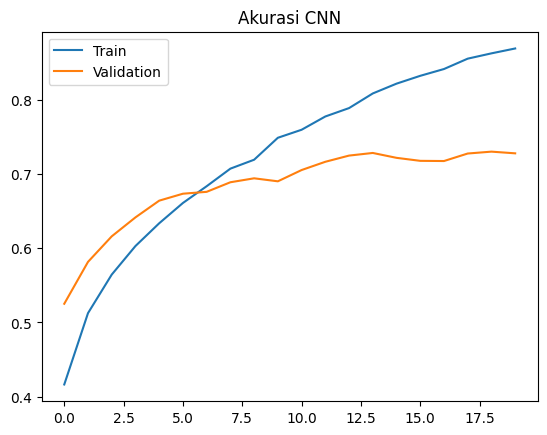

In [20]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title("Akurasi CNN")
plt.show()

# **7. Fungsi Prediksi Gambar**

In [21]:
def predict_image(image_path=None):
    print("\n=== MODE INPUT GAMBAR ===")
    print("Masukkan path gambar")
    print("Ketik 0 atau q untuk kembali ke menu\n")

    while True:
        image_path = input("Path gambar: ")

        if image_path.lower() in ["0", "q"]:
            print("Kembali ke menu utama...")
            break

        img = cv2.imread(image_path)

        if img is None:
            print("❌ Gambar tidak ditemukan!")
            continue

        img = cv2.resize(img, (224, 224))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img, verbose=0)
        class_idx = np.argmax(prediction)
        confidence = np.max(prediction)

        print(f"\n✅ Hasil Prediksi: {CLASS_NAMES[class_idx]}")
        print(f"📊 Confidence: {confidence:.2f}\n")


# **8. Fungsi Prediksi Gambar Menggunakan Kamera**

In [22]:
def camera_predict():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Kamera tidak bisa dibuka")
        return

    print("Tekan:")
    print("  s → simpan gambar & prediksi")
    print("  1 → kembali ke menu")
    print("  q → keluar program")

    save_count = 1

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        h, w, _ = frame.shape

        # 📦 ROI (kotak tengah)
        box_size = 300
        x1 = w // 2 - box_size // 2
        y1 = h // 2 - box_size // 2
        x2 = x1 + box_size
        y2 = y1 + box_size

        roi = frame[y1:y2, x1:x2]

        # 🔄 Preprocess ROI
        img = cv2.resize(roi, (224, 224))
        img_norm = img / 255.0
        img_norm = np.expand_dims(img_norm, axis=0)

        prediction = model.predict(img_norm, verbose=0)
        class_idx = np.argmax(prediction)
        confidence = np.max(prediction)

        label = f"{CLASS_NAMES[class_idx]} ({confidence:.2f})"

        # 🟩 Gambar kotak
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 🏷️ Teks label
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9,
                    (0, 255, 0), 2)

        cv2.imshow("Deteksi Sampah (ROI)", frame)

        key = cv2.waitKey(1) & 0xFF

        # 💾 Simpan gambar
        if key == ord('s'):
            filename = f"hasil_prediksi_{save_count}.jpg"
            cv2.imwrite(filename, roi)
            print(f"✅ Disimpan: {filename} → {label}")
            save_count += 1

        # 🔙 Kembali ke menu
        elif key == ord('1'):
            break

        # ❌ Keluar total
        elif key == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            exit()

    cap.release()
    cv2.destroyAllWindows()


# **9. Fungsi MENU**

In [14]:
def menu():
    print("\n=== SISTEM KLASIFIKASI SAMPAH ===")
    print("1. Upload gambar (input path)")
    print("2. Gunakan kamera")
    print("0. Keluar")

    pilihan = input("Pilih menu: ")

    if pilihan == "1":
        image_path = input("Masukkan path gambar (contoh: sample.jpg): ")
        predict_image(image_path)
        menu()

    elif pilihan == "2":
        camera_predict()
        menu()

    elif pilihan == "0":
        print("Keluar dari sistem")

    else:
        print("Pilihan tidak valid")
        menu()

# **10. Jalankan Sistem**

In [26]:
menu()


=== SISTEM KLASIFIKASI SAMPAH ===
1. Upload gambar (input path)
2. Gunakan kamera
0. Keluar

=== MODE INPUT GAMBAR ===
Masukkan path gambar
Ketik 0 atau q untuk kembali ke menu


✅ Hasil Prediksi: clothes
📊 Confidence: 1.00


✅ Hasil Prediksi: plastic
📊 Confidence: 0.91


✅ Hasil Prediksi: glass
📊 Confidence: 0.69


✅ Hasil Prediksi: cardboard
📊 Confidence: 0.95


✅ Hasil Prediksi: trash
📊 Confidence: 0.84


✅ Hasil Prediksi: clothes
📊 Confidence: 1.00


✅ Hasil Prediksi: shoes
📊 Confidence: 1.00


✅ Hasil Prediksi: paper
📊 Confidence: 0.32


✅ Hasil Prediksi: paper
📊 Confidence: 0.32


✅ Hasil Prediksi: glass
📊 Confidence: 0.92

Kembali ke menu utama...

=== SISTEM KLASIFIKASI SAMPAH ===
1. Upload gambar (input path)
2. Gunakan kamera
0. Keluar
Keluar dari sistem


**Interpretasi:**  
Berdasarkan pengujian menggunakan 10 citra sampel statis, sistem klasifikasi sampah berbasis CNN mampu mengklasifikasikan sebagian besar objek dengan prediksi yang sesuai dan confidence tinggi.
Objek yang memiliki ciri visual jelas seperti clothes, plastic, glass, cardboard, trash, dan shoes terklasifikasi dengan baik (confidence > 0.8).
Namun, pada sampel paper (sample 8) confidence relatif rendah (±0.32), yang menunjukkan bahwa citra kertas memiliki karakteristik visual yang mirip dengan kelas lain sehingga lebih sulit dibedakan oleh model. Selain itu, ada juga kelas yang salah diklasifikasikan.

Secara keseluruhan, sistem berjalan stabil dan mampu memberikan hasil prediksi berulang tanpa harus kembali ke menu utama.

In [25]:
menu()


=== SISTEM KLASIFIKASI SAMPAH ===
1. Upload gambar (input path)
2. Gunakan kamera
0. Keluar
Tekan:
  s → simpan gambar & prediksi
  1 → kembali ke menu
  q → keluar program
✅ Disimpan: hasil_prediksi_1.jpg → clothes (1.00)
✅ Disimpan: hasil_prediksi_2.jpg → plastic (0.92)
✅ Disimpan: hasil_prediksi_3.jpg → glass (0.72)
✅ Disimpan: hasil_prediksi_4.jpg → cardboard (0.96)
✅ Disimpan: hasil_prediksi_5.jpg → trash (0.86)
✅ Disimpan: hasil_prediksi_6.jpg → clothes (1.00)
✅ Disimpan: hasil_prediksi_7.jpg → shoes (1.00)
✅ Disimpan: hasil_prediksi_8.jpg → paper (0.28)
✅ Disimpan: hasil_prediksi_9.jpg → metal (0.33)
✅ Disimpan: hasil_prediksi_10.jpg → glass (0.92)

=== SISTEM KLASIFIKASI SAMPAH ===
1. Upload gambar (input path)
2. Gunakan kamera
0. Keluar
Keluar dari sistem


**Interpretasi**  
Pada mode kamera, sistem berhasil melakukan klasifikasi secara real-time dan menyimpan hasil prediksi beserta citra ketika tombol simpan ditekan.
Hasil prediksi pada mode kamera konsisten dengan mode input gambar, di mana objek seperti clothes, plastic, cardboard, glass, trash, dan shoes memiliki confidence tinggi (hingga 1.00).
Beberapa objek dengan detail kecil atau sudut pengambilan kurang optimal, seperti paper dan metal, menghasilkan confidence lebih rendah, yang menunjukkan pengaruh kondisi pencahayaan dan framing kamera terhadap performa model.

Mode kamera membuktikan bahwa sistem dapat digunakan secara interaktif dan mendukung penggunaan langsung di lingkungan nyata.

# **11. Evaluasi Keandalan Sistem**

## **11. Analisis Sistem**

Sistem klasifikasi sampah berbasis Convolutional Neural Network (CNN) berhasil dijalankan
dan diuji tanpa mengalami crash atau error selama proses pengujian.
Sistem mampu menerima input berupa citra sampah, melakukan proses preprocessing,
menjalankan model klasifikasi, serta menghasilkan output berupa label jenis sampah
secara otomatis dan interaktif.

Berdasarkan hasil pengujian, sistem menunjukkan kinerja yang stabil dan fungsional.
Namun, pada beberapa kondisi tertentu seperti pencahayaan yang kurang optimal
atau citra yang mengandung lebih dari satu objek,
akurasi prediksi dapat mengalami penurunan.
Hal ini menunjukkan bahwa meskipun sistem telah berfungsi dengan baik
dan sesuai dengan tujuan yang diharapkan,
masih terdapat peluang untuk peningkatan performa di masa mendatang.

Secara keseluruhan, sistem ini layak digunakan sebagai prototipe
aplikasi visi komputer untuk klasifikasi sampah berbasis citra.